In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

sns.set_theme(context='notebook')
plt.style.use('fivethirtyeight')

## Load the Data

In [2]:
df = pd.read_csv('data/Airbnb_Open_Data.csv', low_memory=False, parse_dates=['last review'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Inspect the Data

### Handle Duplicates

In [3]:
df['id'].count()

102599

In [4]:
# checkout for duplicated records
df['id'].duplicated().sum()

541

In [5]:
# small inspection
df[df['id'].duplicated(keep=False)].sort_values(by='id')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,US,False,moderate,Entire home/apt,2008.0,$105,$21,30.0,2.0,2019-06-08,0.21,3.0,34.0,157.0,NaN,NaN
102474,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,United States,US,False,moderate,Entire home/apt,2008.0,$105,$21,30.0,2.0,2019-06-08,0.21,3.0,34.0,157.0,NaN,NaN
102475,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,US,False,moderate,Entire home/apt,2008.0,$285,$57,30.0,6.0,2019-01-31,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN
9099,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,United States,US,False,moderate,Entire home/apt,2008.0,$285,$57,30.0,6.0,2019-01-31,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN
9100,6027266,ACADIA Spacious 2 Bedroom Apt - Close to Hospi...,95854111798,verified,Juliana,Manhattan,Upper East Side,40.76021,-73.96157,United States,US,False,moderate,Entire home/apt,2014.0,$586,$117,30.0,10.0,2018-11-18,0.22,5.0,34.0,211.0,No Smoking No Pets,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62657,35606797,Bright and Beautiful Top Floor Two Bedrooms,65331079885,unconfirmed,Frankie,Brooklyn,Carroll Gardens,40.68383,-73.99281,United States,US,True,moderate,Entire home/apt,2009.0,"$1,027",$205,30.0,18.0,2021-11-04,0.63,2.0,1.0,3.0,NaN,NaN
102240,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,United States,US,True,strict,Private room,2015.0,$141,$28,30.0,1.0,2021-11-04,0.25,3.0,4.0,307.0,NaN,NaN
62658,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,United States,US,True,strict,Private room,2015.0,$141,$28,30.0,1.0,2021-11-04,0.25,3.0,4.0,307.0,NaN,NaN
102241,35607902,Modern NEW Room|PRIVATE BATHROOM,7431680152,verified,Dariia & Jacob,Brooklyn,Bedford-Stuyvesant,40.68990,-73.94074,United States,US,True,moderate,Private room,2008.0,$284,$57,30.0,1.0,2021-11-04,0.25,2.0,10.0,365.0,NaN,NaN


In [6]:
# dropping duplicated data
df.drop_duplicates(subset=['id'], inplace=True)

In [7]:
# our dataset 
df.shape

(102058, 26)

### Correct Data Types

In [8]:
# transform price and service fee to numerical

df['price'] = df.price.str.replace('$', '', regex=True).replace(',', '', regex=True).astype('float')
df['service fee'] = df['service fee'].str.replace('$', '', regex=True).astype('float')

In [9]:
# Convert 'id' and 'host id' to string
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)

### Handle Missing Values

In [10]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [11]:
# The median is less affected by outliers compared to the mean

df['price'].fillna(df['price'].median(), inplace=True)
df['service fee'].fillna(df['service fee'].median(), inplace=True)

In [12]:
df['reviews per month'].fillna(0, inplace=True)

In [13]:
df['host name'].fillna('Unknown', inplace=True)
df['house_rules'].fillna('No rules specified', inplace=True)

## Check each variable

*Μετά την αφαίρεση των διπλοεγγραφών έχουμε 102.058 εγγραφές με τις ακόλουθες στήλες.*

**Categorical columns**:
- neighbourhood group
- neighbourhood
- instant_bookable
- cancellation_policy
- room type
- house_rules
- license

**Numerical columns**
- price
- service fee
- minimum nights
- number of reviews
- reviews per month
- review rate number
- availability 365

**Others**
- Construction year
- lat
- long
- last review

In [14]:
# create function to check categorical variables

def describe_categorical_variable(df, variable):

    missing = df[variable].isna().sum()
    
    df[variable].value_counts(ascending=True).plot.barh(title=variable)

    print(f'{variable} column has {missing} missing values')
    
    return df[variable].value_counts()

neighbourhood group column has 29 missing values
--neighbourhood group--
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64



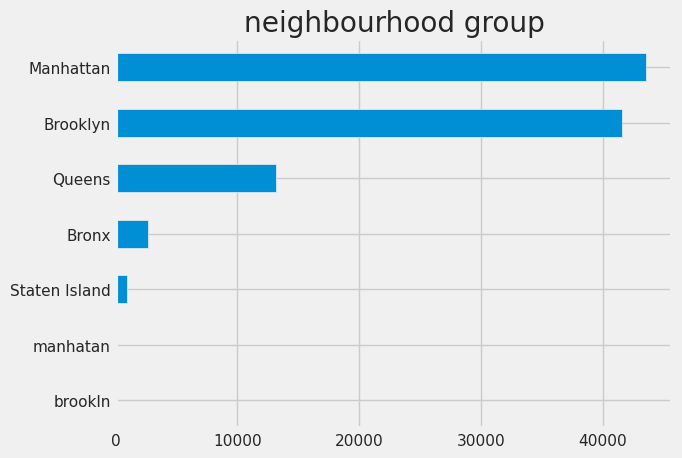

neighbourhood column has 16 missing values
--neighbourhood--
Bedford-Stuyvesant        7898
Williamsburg              7732
Harlem                    5441
Bushwick                  4956
Hell's Kitchen            3949
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: neighbourhood, Length: 224, dtype: int64



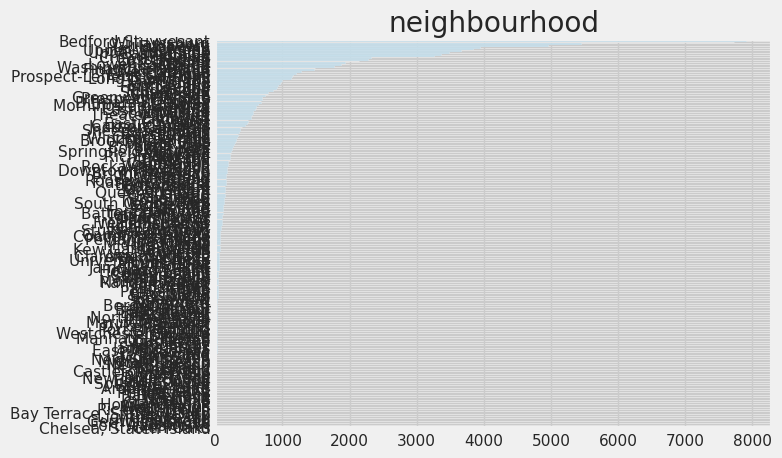

instant_bookable column has 105 missing values
--instant_bookable--
False    51186
True     50767
Name: instant_bookable, dtype: int64



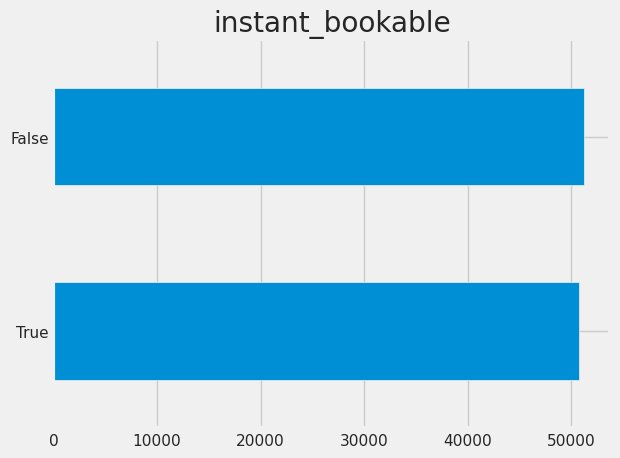

cancellation_policy column has 76 missing values
--cancellation_policy--
moderate    34162
strict      33929
flexible    33891
Name: cancellation_policy, dtype: int64



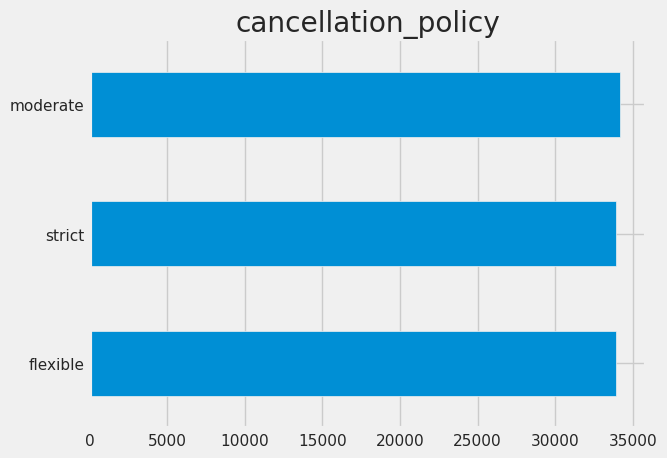

room type column has 0 missing values
--room type--
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: room type, dtype: int64



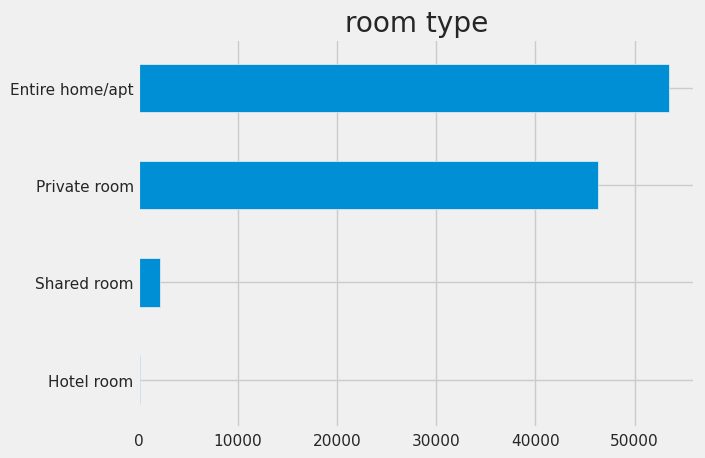

In [15]:
cat_columns = ['neighbourhood group', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type']


for col in cat_columns:
    print(f'--{col}--', describe_categorical_variable(df, col), sep='\n', end='\n\n')
    plt.show()

In [16]:
# create function to check numerical variables

def describe_numeric_variable(df, variable, bins=50):

    missing = df[variable].isna().sum()

    fig, axes = plt.subplots(2, 1)
    
    df[variable].plot.hist(bins=bins, ax=axes[0])
    df[variable].plot.box(vert=False)
    plt.suptitle(f'{variable} distribution')

    plt.tight_layout()

    print(f'{variable} column has {missing} missing values')
    
    return df[variable].describe().to_frame().T

price column has 0 missing values
--price--
          count       mean         std   min    25%    50%    75%     max
price  102058.0  625.35472  331.271047  50.0  341.0  625.0  912.0  1200.0



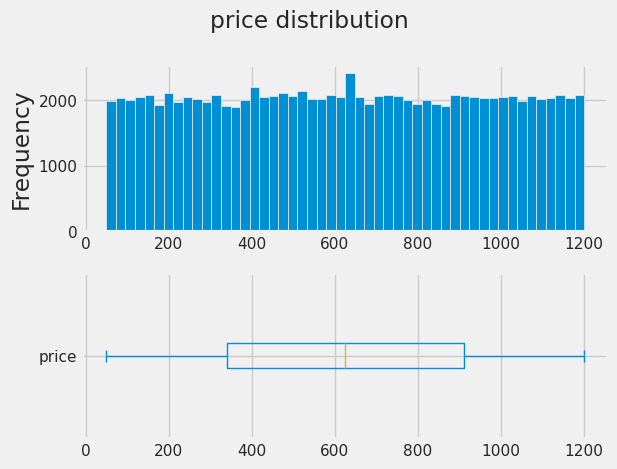




service fee column has 0 missing values
--service fee--
                count        mean        std   min   25%    50%    75%    max
service fee  102058.0  125.039144  66.237136  10.0  68.0  125.0  182.0  240.0



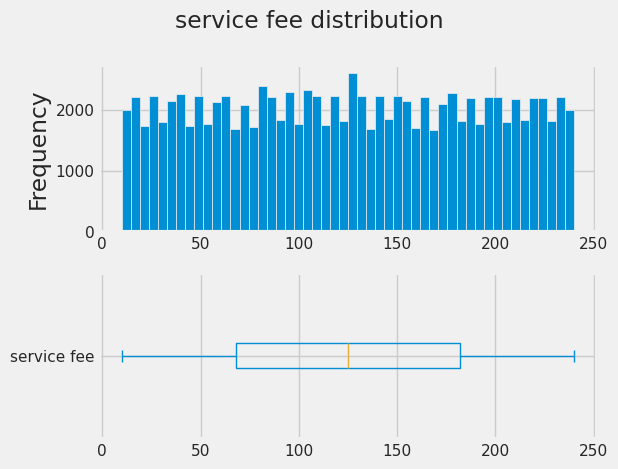




minimum nights column has 400 missing values
--minimum nights--
                   count     mean        std     min  25%  50%  75%     max
minimum nights  101658.0  8.12664  30.616698 -1223.0  2.0  3.0  5.0  5645.0



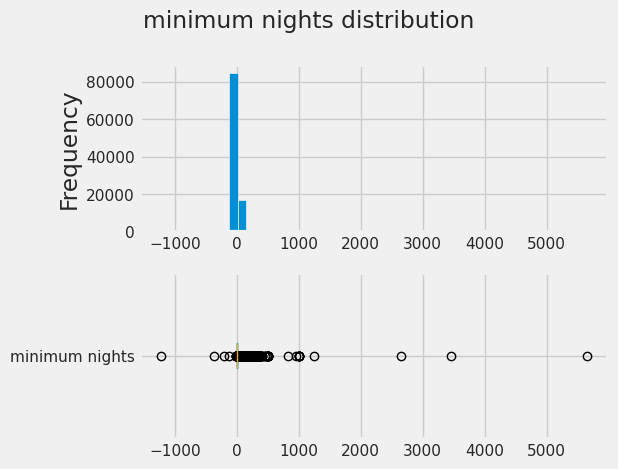




number of reviews column has 183 missing values
--number of reviews--
                      count       mean        std  min  25%  50%   75%     max
number of reviews  101875.0  27.517948  49.571744  0.0  1.0  7.0  31.0  1024.0



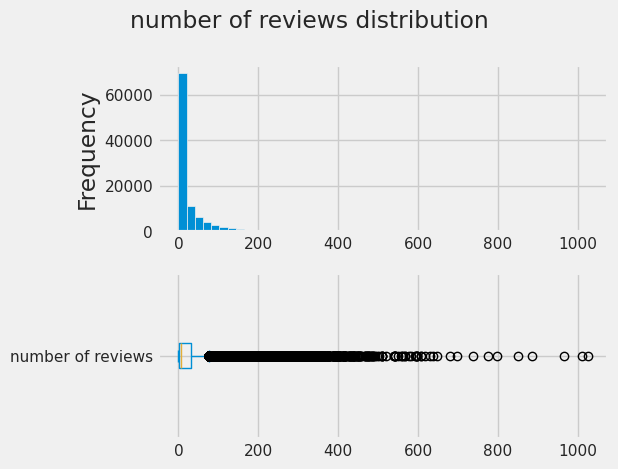




reviews per month column has 0 missing values
--reviews per month--
                      count      mean       std  min   25%   50%   75%   max
reviews per month  102058.0  1.162233  1.682184  0.0  0.09  0.48  1.71  90.0



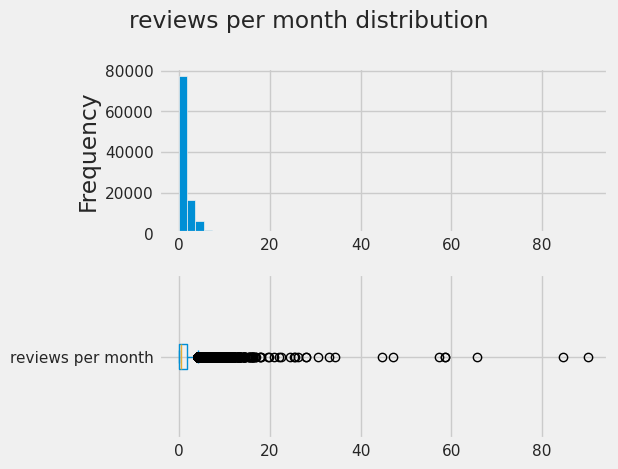




review rate number column has 319 missing values
--review rate number--
                       count      mean       std  min  25%  50%  75%  max
review rate number  101739.0  3.278733  1.285089  1.0  2.0  3.0  4.0  5.0



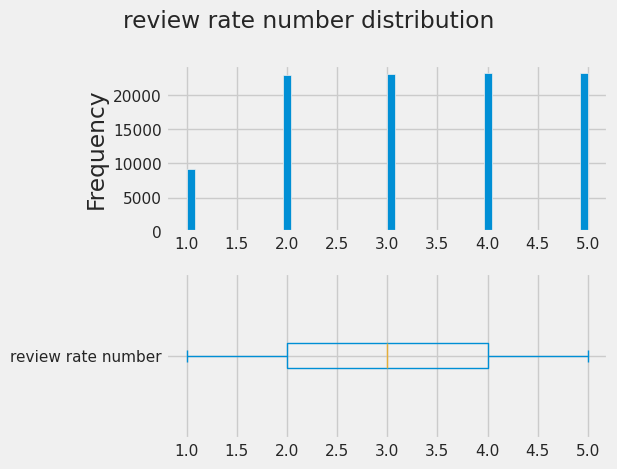




availability 365 column has 448 missing values
--availability 365--
                     count        mean         std   min  25%   50%    75%  \
availability 365  101610.0  141.043992  135.429156 -10.0  3.0  96.0  268.0   

                     max  
availability 365  3677.0  



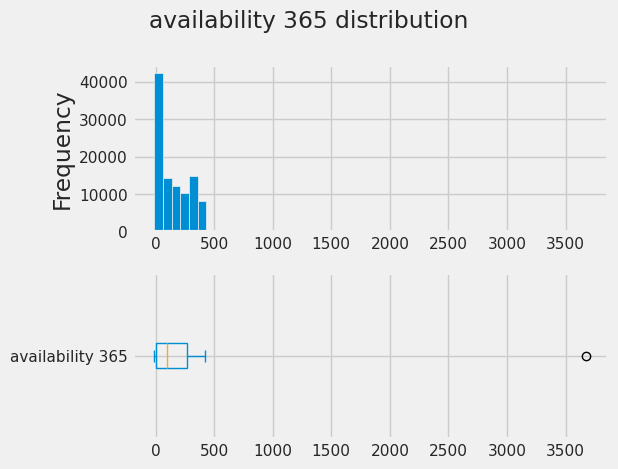

In [17]:
num_colums = ['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'availability 365']

for col in num_colums:
    print(f'--{col}--', describe_numeric_variable(df, col), sep='\n', end='\n\n')
    plt.show()
    print('\n\n')

In [18]:
others = ['Construction year', 'lat', 'long', 'last review']

Construction year has 214 missing values


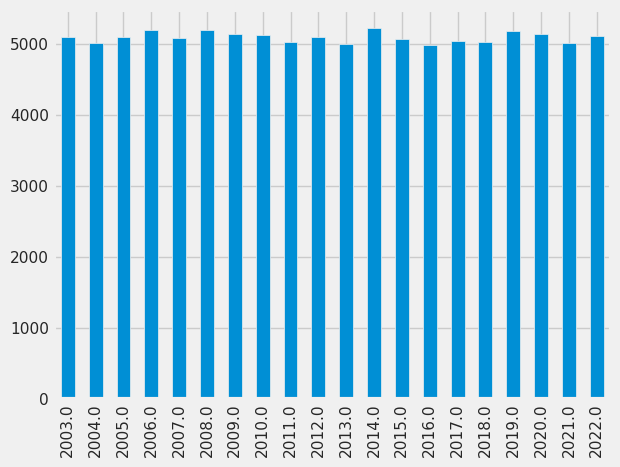

In [19]:
missing = df['Construction year'].isna().sum()
print(f'Construction year has {missing} missing values')

df['Construction year'].value_counts().sort_index().plot.bar();

In [20]:
missing = df['last review'].isna().sum()
print(f'last review column has {missing} missing values')

min_date, max_date = df['last review'].min(), df['last review'].max()

print(f'Dates are from {min_date} to {max_date}')

last review column has 15832 missing values
Dates are from 2012-07-11 00:00:00 to 2058-06-16 00:00:00


## Final notes for the next stage (EDA)

**Categorical columns**:
- neighbourhood group: *Δύο τιμές χρειάζονται διόρθωση για να έχουν ομοιογένεια manhattan, brooklyn. Φαίνεται χρήσιμη μεταβλητή.*
- neighbourhood: *Λόγω του πλήθους των γειτονιών ενδεχομένως να δούμε μόνο 5 ή 10 πιο δημοφιλείς ή τις 5/10 μη δημοφιλής*
- instant_bookable: *Μοιρασμένη κατηγορία (ενδεχομένη σύγκριση με το price και τα review numbers)*
- cancellation_policy: *Επίσης μοιρασμένη κατηγορία (ενδεχομένη σύγκριση με το price και τα review numbers)*
- room type: *Δύο κατηγορίες είναι επικρατέστερες και θα μπορούσαμε να τις συγκρίνουμε με το price και τα review numbers*
- house_rules
- license: *Πολλές κενές μεταβλητές για να είναι χρήσιμο*

**Numerical columns**
- price: *Ομοιόμορφη κατανομή, χρήσιμη για σύγκριση με ποιοτικές μεταβλητές*
- service fee: *Επίσης ομοιόμορφη κατανομή*
- minimum nights: *Υπάρχουν εγγραφές με ακραίες τιμές όπως επίσης και αρκετές ?αρνητικές?*
- number of reviews: *Οι περισσότερες τιμές κυμαίνονται από 0 έως 31 με κάποιες ακραίες τιμές (ενδεχομένως θα μπορούσα να το χρησιμοποιήσουμε ως δείκτη δημοφιλίας)*
- reviews per month: *Το ίδιο με το `number of reviews`*
- review rate number: *Το ίδιο με το `number of reviews`*
- availability 365: *Επίσης ορισμένες αρνητικές τιμές*

**Others**
- Construction year: *Ομοιογενή κατανομή από 2003 έως 2022*
- lat: *Χρήσιμα για απεικόνιση*
- long: *Χρήσιμα για απεικόνιση*
- last review: *Υπάρχουν λανθασμένες καταχωρήσεις*

In [21]:
# replace the two wrong records

fix = {'brookln': 'Brooklyn', 'manhatan':'Manhattan'}

df['neighbourhood group'] = df['neighbourhood group'].replace(fix)

df['neighbourhood group'].value_counts() # checking the result

Manhattan        43558
Brooklyn         41631
Queens           13197
Bronx             2694
Staten Island      949
Name: neighbourhood group, dtype: int64

In [22]:
# save our final dataset before EDA

df.to_csv('data/Airbnb_Open_Data_clean.csv', index=False)